In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cells.csv to cells.csv


Most of the time to fit a model, you can just:

1) determine the axis x and y

2) make an instance from the desired model

3) fit the model to your dataset ( traindata) : also called training

    In this step you want to fit the model based on the determined axises.
4) 

In [ ]:
df = pd.read_csv('cells.csv')
df

,time,cells
0,0.0,205
1,0.5,225
2,1.0,238
3,1.5,240
4,2.0,248
5,2.5,260
6,3.0,265
7,3.5,283
8,4.0,301
9,4.5,305


Predicted line in excel:

intercept: 210.2727

slope: 20.58182

the line equation: y = 20.58182 * x + 210.2727  

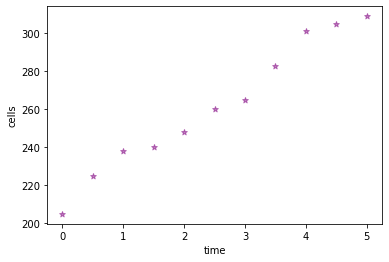

In [ ]:
plt.xlabel('time')
plt.ylabel('cells')
# alpha : transparacy : 0 transparent and 1: opaque
#marker" the shape , default is circles
plt.scatter(df.time, df.cells , color='purple' , marker = '*' , alpha=0.5)

In [ ]:
#delete time column of the dataset in order to have only the y, the cells column
x_train = df.drop('cells', axis='columns')
x_train

,time
0,0.0
1,0.5
2,1.0
3,1.5
4,2.0
5,2.5
6,3.0
7,3.5
8,4.0
9,4.5


In [ ]:
#This is the other way of selecting a row of a dataset
#just say its name
y_train = df.cells
y_train

0     205
1     225
2     238
3     240
4     248
5     260
6     265
7     283
8     301
9     305
10    309
Name: cells, dtype: int64

**Create a model instance**

In [ ]:
model = linear_model.LinearRegression()

**Train the model = fit the linear model to it**

In [ ]:
model.fit(x_train,y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Get the equation of the fitted line:

In [ ]:
intercept = model.intercept_
slope = model.coef_
print("equation:  y    =    x *", round(float(slope),5) , " + " , round(float(intercept),5) )

equation:  y    =    x * 20.58182  +  210.27273


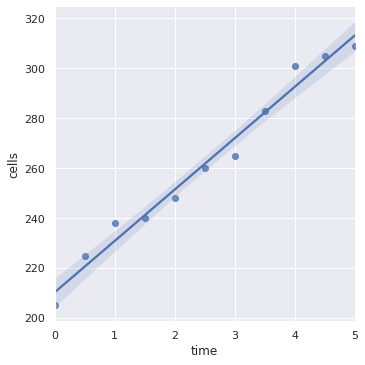

In [ ]:
#Using Seaborn for plotting and linregress from scipy stats library
import pandas as pd
import seaborn as sns
sns.lmplot(x='time', y='cells', data=df, order=1 )

#If you want equation, not possible to display in seaborn but you can get it the regular way using scipy stats module. 
from scipy import stats
# slope, intercept, r_value, p_value, std_err = stats.linregress(df['time'],df['cells'])


The loss function is the sum of squared residuals ( R^2 Values)

This is the error on the training set ( on all observed data)

In [ ]:
model.score(x_train , y_train) 

0.9784252641866714

Lets test new data on the model.

For e.g. 2.3 , we predict something near to 260, due to the trainset and the equation of the model.

In [ ]:
new_point = [[2.3]]
model.predict(new_point)

array([257.61090909])

Test Phase on a test data set

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test_Set.csv to Test_Set.csv


In [ ]:
test_set = pd.read_csv('Test_Set.csv')
test_set.head(5)

,time
0,0.1
1,0.2
2,0.3
3,0.4
4,0.5


In [ ]:
prediction = model.predict(test_set)
prediction
#We got the y for each x in the test set

array([212.33090909, 214.38909091, 216.44727273, 218.50545455,
       220.56363636, 222.62181818, 224.68      , 226.73818182,
       228.79636364, 230.85454545, 232.91272727, 234.97090909,
       237.02909091, 239.08727273, 241.14545455, 243.20363636,
       245.26181818, 247.32      , 249.37818182, 251.43636364,
       253.49454545, 255.55272727, 257.61090909, 259.66909091,
       261.72727273, 263.78545455, 265.84363636, 267.90181818,
       269.96      , 272.01818182, 274.07636364, 276.13454545,
       278.19272727, 280.25090909, 282.30909091, 284.36727273,
       286.42545455, 288.48363636, 290.54181818, 292.6       ])

In [ ]:
#we create a new dataframe with the x and y of test
test_set['cells'] = prediction
test_set.head(5)

,time,cells
0,0.1,212.330909
1,0.2,214.389091
2,0.3,216.447273
3,0.4,218.505455
4,0.5,220.563636


Test the accuracy on the test set this time.

As we expected, the accuracy is %100 becuse we first got the y_s from the model and then build the dataframe and test the model on it.

In [ ]:
x_test = test_set.drop('cells', axis='columns')
y_test = test_set.cells
model.fit(x_test , y_test)
print(model.score(x_test , y_test) )
print(model.coef_)
print(model.intercept_)

1.0
[20.58181818]
210.2727272727273


Now lets create a random dataset for testing model on it.

In [ ]:
import numpy as np
x_arr = [ 1 ,3, 0 ,5 , 9 , -1 , -30 ]
y_arr = [ 230 ,260, 200 ,310 , 410 , 180 ,30 ] # e.g the last y is very different from what it should be so the acc is low about %80
x_numpy_arr = np.array (x_arr)
y_numpy_arr = np.array(y_arr)
data = np.array([x_numpy_arr , y_numpy_arr])
data= data.T
test_df = pd.DataFrame(data=data[0:,0:],    # values in the table
          #  index=data[0:,0],    # first column as index
          columns=['time' , 'cells'])  # first row as the column names
test_df

,time,cells
0,1,230
1,3,260
2,0,200
3,5,310
4,9,410
5,-1,180
6,-30,30


In [ ]:
x_test = test_df.drop('cells' , axis = 'columns')
y_test = test_df.cells

In [ ]:
model.fit(x_test, y_test)
print(model.score(x_test,y_test))

0.8108523497570581
